# Trabalho #1 - Treinamento customizado

Nesse trabalho você vai treinar uma RNA para prever se um tumor é maligno ou benigno usando o conjunto de dados "Breast Cancer Dataset", disponível no UCI Machine Learning Repository (https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(original)


Esse conjunto de dados foi obtido pelo Hospital da University de Wisconsin, Madison por: O. L. Mangasarian e W. H. Wolberge, "Cancer diagnosis via linear programming", SIAM News, Volume 23, Number 5, September 1990, pp 1 & 18.

## Coloque o seu nome:

Nome: Bruno Rodrigues Silva

## 1. Importar bibliotecas

Execute a célula abaixo para importar as principais bilbiotecas necessárias.

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## 2.  Carregar dados

Esse conjunto de dados possui 699 exemplos, sendo que cada exemplo é composto por 10 características ontidas por exames de células de tecidos que podem ser da classe de cancer maligno ou benigino.

As características de cada exemplo são as seguintes:

1. Número de identificação da amostra: id
2. Espessura do aglomerado: 1 - 10
3. Uniformidade do tamanho da célula: 1 - 10
4. Uniformidade da forma celular: 1 - 10
5. Adesão Marginal: 1 - 10
6. Tamanho de célula epitelial única: 1 - 10
7. Núcleos expostos: 1 - 10
8. Cromatina Suave: 1 - 10
9. Nucléos normais: 1 - 10
10. Mitoses: 1 - 10
11. Casse: 2 para benigno e 4 para maligno

Execute a célula abaixo para carregar o conjunto de dados e criar um DataFrame Pandas. Para facilitar o entendimento dos dados vamos definir explicitamente os nomes das colunas porque o arquivo CSV original não possui o cabeçalho com os nomes das colunas.

In [2]:
DATASET_URL = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"
data_file = tf.keras.utils.get_file("breast_cancer.csv", DATASET_URL)
col_names = ["id", "espessura", "un_tam_cel", "un_forma_cel", "adesao_marginal", "tam_cel_epit", "nucleos_exp", "cromatina", "nucleos_normais", "mitoses", "classe"]
df = pd.read_csv(data_file, names=col_names, header=None)

24576/19889 [=====================================] - 0s 6us/step


Execute as duas células abaixo para visualizar os dados e verificar o número de exemplos.

In [3]:
df.head()

,id,espessura,un_tam_cel,un_forma_cel,adesao_marginal,tam_cel_epit,nucleos_exp,cromatina,nucleos_normais,mitoses,classe
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [4]:
print('Dimensão dos dados:', df.shape)

Dimensão dos dados: (699, 11)


## 3. Pré-processamento dos dados

Os dados precisam ser pré-processados para poderem ser utilzados por uma RNA. 

As seguintes etapas devem ser realizadas no processamento:

1. Retirar a coluna da identificação da amostra ("id");
2. Eliminar dados que possuem valores "desconhecidos";
3. Transformar classes de índices 2 e 4 para 0 e 1, 0 é benigno e 1 é maligno;
4. Dividir dados nos conjuntos de treinamento e teste;
5. Separar coluna das classes (dados de saídas reais) das outras colunas (dados de entradas);
6. Normalizar os dados de entrada;
7. Conveter DataFrame Pandas para tf.Tensor. 

### 3.1 Retirar coluna de identificação da amostra ("id")

Execute a célula baixo para realizar essa operação.

In [5]:
df.pop("id")
df.head()

,espessura,un_tam_cel,un_forma_cel,adesao_marginal,tam_cel_epit,nucleos_exp,cromatina,nucleos_normais,mitoses,classe
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


### 3.2 Eliminar dados "desconhecidos"

Se você inspecionar os dados vai verificar que existem valores "desconehcidos" na coluna de "nucleos_exp". Para verificar quais amostras possuem valores desconhecidos execute a célula abaixo.

In [6]:
df[df["nucleos_exp"] == '?']

,espessura,un_tam_cel,un_forma_cel,adesao_marginal,tam_cel_epit,nucleos_exp,cromatina,nucleos_normais,mitoses,classe
23,8,4,5,1,2,?,7,3,1,4
40,6,6,6,9,6,?,7,8,1,2
139,1,1,1,1,1,?,2,1,1,2
145,1,1,3,1,2,?,2,1,1,2
158,1,1,2,1,3,?,1,1,1,2
164,5,1,1,1,2,?,3,1,1,2
235,3,1,4,1,2,?,3,1,1,2
249,3,1,1,1,2,?,3,1,1,2
275,3,1,3,1,2,?,2,1,1,2
292,8,8,8,1,2,?,6,10,1,4


Deve-se eliminar as linhas que possuem dados desse tipo. Além disso, a coluna "nucleos_exp" não é uma coluna numérica e, portanto, deve ser convertida para valores numéricos. Execute a célula abaixo para realizar essas operações.

In [7]:
# Elimina linhas com dados desconhecidos na coluna "nucleos_exp"
df = df[df["nucleos_exp"] != '?' ]

# Converte coluna "nucleo_exp" para valores numéricos
df.nucleos_exp = pd.to_numeric(df.nucleos_exp)
df

,espessura,un_tam_cel,un_forma_cel,adesao_marginal,tam_cel_epit,nucleos_exp,cromatina,nucleos_normais,mitoses,classe
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2,1,1,1,2
695,2,1,1,1,2,1,1,1,1,2
696,5,10,10,3,7,3,8,10,2,4
697,4,8,6,4,3,4,10,6,1,4


- Observe que o conjunto de dados agora tem 683 exemplos, ou seja, 16 exemplos foram retirados porque tinham valores "unknown".

### 3.3 Transformar código das classes de câncer

Primeiramente vamos verificar o número de exemplos de cada classe. Lembre que:

- Classe = 2 $\to$ câncer benigno
- Classe = 4 $\to$ câncer maligno

Observa-se que é importante fazer essa verificação porque se o número de exemplos das classes for muito desbalanceado temos que usar técnicas especiais para treinar a RNA, como já visto anteriormente.

Para visualizar o número de exemplos de cada classe vamos calcular e fazer o gráfico do histograma da coluna "classe".

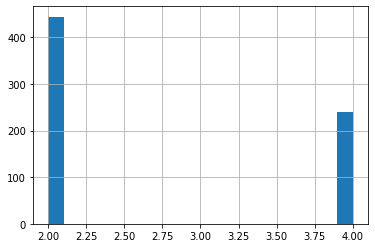

In [8]:
df['classe'].hist(bins=20) 

Para poder modelar esse problema como um problema de classificão binária, que detecta se o tumor é maligno ou não, temos que alterar os códigos das classes para o seguinte:

- Câncer benigno (2.0) = 0
- Câncer maligno (4.0) = 1

In [9]:
df['classe'] = np.where(df['classe'] == 2, 0, 1)
df

,espessura,un_tam_cel,un_forma_cel,adesao_marginal,tam_cel_epit,nucleos_exp,cromatina,nucleos_normais,mitoses,classe
0,5,1,1,1,2,1,3,1,1,0
1,5,4,4,5,7,10,3,2,1,0
2,3,1,1,1,2,2,3,1,1,0
3,6,8,8,1,3,4,3,7,1,0
4,4,1,1,3,2,1,3,1,1,0
...,...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2,1,1,1,0
695,2,1,1,1,2,1,1,1,1,0
696,5,10,10,3,7,3,8,10,2,1
697,4,8,6,4,3,4,10,6,1,1


### Exercício #1: Dividir e embaralhar conjunto de dados 

Vamos dividir o conjunto de dados em conjuntos de treinamento e teste. Como o número de amostras é pequeno, faremos a validação no conjunto de teste.

Nessa divisão vamos utilizar 80% dos dados como sendo de treinamento e 20% como sendo de teste/validação.

Para realizar essa divisão usaremos a função `train_test_split()` da biblioteca ScikitLearn. Observe que você deve usar essa função também para embaralhar aleatoriamente os dados.  

In [24]:
# Para você fazer: Dividir e embaralhar dados

# Importa função para dividir conjunto de dados
from sklearn.model_selection import train_test_split

# Realiza divisão dos dados 
# Inclua seu código aqui
#
train, test = train_test_split(df, shuffle=True, train_size=0.8, random_state=42)
print(f"Dimensão dos dados de treinamento: {train.shape}\nDimensão dos dados de teste: {test.shape}")

Dimensão dos dados de treinamento: (546, 10)
Dimensão dos dados de teste: (137, 10)


**Saída esperada:**

    Dimensão dos dados de treinamento: (546, 10)
    Dimensão dos dados de teste: (137, 10)

### 3.4 Separar coluna das classes (saída desejada)

Devemos separar a coluna das classes dos conjuntos de treinamento e teste para criar as saídas desejadas de treinamento e teste.

In [25]:
train_Y = train.pop("classe")
test_Y = test.pop("classe")
train_Y

452    0
264    1
599    0
18     1
364    0
      ..
73     1
108    0
279    1
450    0
104    1
Name: classe, Length: 546, dtype: int64

Vamos calcular as estatísticas básicas das saídas dos conjuntos de treinamento e teste para verificar se ambos possuem a mesma distribuição.

In [26]:
print('Estatística das saídas de treinamento:\n', train_Y.describe())
print('\nEstatística das saídas de teste:\n', test_Y.describe())

Estatística das saídas de treinamento:
 count    546.000000
mean       0.331502
std        0.471185
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: classe, dtype: float64

Estatística das saídas de teste:
 count    137.000000
mean       0.423358
std        0.495904
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: classe, dtype: float64


### 3.5 Normalizar dados de entrada

Antes de normalizar os dados de entrada é importante calcular as suas estatísticas básicas. Os valores de média e desvio padrão das caracteríticas dos dados de entrada de treinamento serão usados para normalizar os dados de treinamento e de teste.

In [27]:
train_stats = train.describe()
train_stats = train_stats.transpose()
print(train_stats.shape)
train_stats

(9, 8)


,count,mean,std,min,25%,50%,75%,max
espessura,546.0,4.415751,2.762337,1.0,2.0,4.0,6.00,10.0
un_tam_cel,546.0,3.106227,3.056003,1.0,1.0,1.0,4.75,10.0
un_forma_cel,546.0,3.212454,3.035374,1.0,1.0,1.0,5.00,10.0
adesao_marginal,546.0,2.824176,2.857830,1.0,1.0,1.0,4.00,10.0
tam_cel_epit,546.0,3.184982,2.179267,1.0,2.0,2.0,4.00,10.0
nucleos_exp,546.0,3.468864,3.630647,1.0,1.0,1.0,5.00,10.0
cromatina,546.0,3.315018,2.383359,1.0,2.0,3.0,4.00,10.0
nucleos_normais,546.0,2.752747,2.949614,1.0,1.0,1.0,3.00,10.0
mitoses,546.0,1.553114,1.632783,1.0,1.0,1.0,1.00,10.0


### Exercícios #2: Normalizar dados de entrada

Os dados de entrada serão normalizados para terem média igual a zero e disvio padrão igual a 1. Assim, a normalizaçãp de cada coluna deve ser feita de acordo com a seguinte equação:

$$X_{norm,i} = \frac{(X_i - \mu_i)} {\sigma_i}$$

onde $X_i$ é a i-ésima coluna dos dados, $\mu_i$ é a média da i-ésima coluna, $\sigma_i$ é o desvio padrão da i-ésima coluna e $X_{norm,i}$ é a i-ésima coluna dos dados normalizada.

In [31]:
# Para você fazer: Normalizar dados

# Define função para normalizar as colunas
# Inclua seu código aqui
#
def normalize_column(x):
    return (x-x.mean())/x.std()
# Normaliza dados entrada de treinamento e teste
# Inclua seu código aqui
#
X_train_norm = train.apply(lambda x:normalize_column(x))
X_test_norm = test.apply(lambda x:normalize_column(x))
# Visualiza dados de entrada de treinamento normalizados
X_train_norm

,espessura,un_tam_cel,un_forma_cel,adesao_marginal,tam_cel_epit,nucleos_exp,cromatina,nucleos_normais,mitoses
452,-0.512519,-0.689210,-0.728890,0.061524,-0.543752,-0.680007,-0.971326,-0.594229,-0.338755
264,0.935530,1.928589,0.259456,2.510934,3.127206,-0.129141,0.706978,0.083825,0.886147
599,0.211505,-0.361985,0.259456,-0.638308,-1.002622,-0.680007,-0.971326,-0.594229,-0.338755
18,2.021567,1.274139,1.247802,1.111271,0.373987,1.798890,0.287402,-0.594229,0.273696
364,-0.874532,-0.689210,-0.728890,-0.638308,-0.543752,-0.680007,-0.132174,-0.594229,-0.338755
...,...,...,...,...,...,...,...,...,...
73,1.659555,0.292465,0.588905,2.510934,1.291727,1.798890,0.287402,1.778963,-0.338755
108,-1.236544,-0.689210,-0.728890,-0.638308,-0.543752,-0.680007,-0.551750,0.083825,-0.338755
279,2.021567,0.619689,1.247802,0.061524,-0.084883,0.972591,-0.132174,0.083825,3.948403
450,-0.150507,-0.689210,-0.728890,0.061524,-1.002622,-0.680007,-0.551750,-0.594229,-0.338755


In [32]:
X_train_norm.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
espessura,546.0,-1.032955e-16,1.0,-1.236544,-0.874532,-0.150507,0.573518,2.021567
un_tam_cel,546.0,-4.229421e-17,1.0,-0.689210,-0.689210,-0.689210,0.537883,2.255814
un_forma_cel,546.0,3.904081e-17,1.0,-0.728890,-0.728890,-0.728890,0.588905,2.236148
adesao_marginal,546.0,-7.401487e-17,1.0,-0.638308,-0.638308,-0.638308,0.411439,2.510934
tam_cel_epit,546.0,2.887393e-16,1.0,-1.002622,-0.543752,-0.543752,0.373987,3.127206
nucleos_exp,546.0,-7.889497e-17,1.0,-0.680007,-0.680007,-0.680007,0.421725,1.798890
cromatina,546.0,-1.626700e-17,1.0,-0.971326,-0.551750,-0.132174,0.287402,2.804858
nucleos_normais,546.0,9.719535e-17,1.0,-0.594229,-0.594229,-0.594229,0.083825,2.457017
mitoses,546.0,3.253401e-18,1.0,-0.338755,-0.338755,-0.338755,-0.338755,5.173305


**Saída esperada:**

       count	        mean	std  	min  25% 50%	  75%	 max 
       espessura	     546.0	  -2.373966e-17  	1.0	  -1.225570   -0.871516  -0.163409  0.544698  1.960912
       un_tam_cel	     546.0	-8.743515e-17	1.0	-0.706795	-0.706795	-0.706795	0.566836	2.158875
       un_forma_cel  	546.0	9.800870e-17	1.0	-0.746659	-0.746659	-0.746659	0.549607	2.169940|    
       adesao_marginal 	546.0	9.190857e-17	1.0	-0.658547	-0.658547	-0.658547	0.372715	2.435239
       tam_cel_epit     546.0	1.352195e-16	1.0	-0.998697	-0.563163	-0.563163	0.307905	2.921108
       nucleos_exp  	    546.0	-4.636096e-17	1.0	-0.695540	-0.695540	-0.695540	0.612569	1.782983
       cromatina        546.0	-3.700743e-17	1.0	-0.982966	-0.583636	-0.184306	0.215024	2.611003
       nucleos_normais   546.0	2.257047e-16	1.0	-0.620388	-0.620388	-0.620388	0.347417	2.283027
       mitoses	         546.0	-9.007853e-17	1.0	-0.352816	-0.352816	-0.352816	-0.352816	4.716589

### Exercício #3: Converter DataFrame para tf.Tensor

Para os dados poderem ser usados por uma RNA em um loop de treinamento customizado eles devem estar no forma de tensores do TensorFlow, assim, vamos converter os dados para tf.Tensor.

In [33]:
# Converte entradas para tf.Tensor
X_train = tf.convert_to_tensor(X_train_norm.to_numpy(), dtype=tf.float32)
X_test = tf.convert_to_tensor(X_test_norm.to_numpy(), dtype=tf.float32)

# Convert saídas para tf.Tensor e ajusta dimensões
Y_train = tf.convert_to_tensor(np.reshape(train_Y.to_numpy(), (546,1)), dtype=tf.int32)
Y_test = tf.convert_to_tensor(np.reshape(test_Y.to_numpy(), (137,1)), dtype=tf.int32)

print('Dimensão dos dados de entrada de treinamemto:', X_train.shape)
print('Dimensão dos dados de entrada de teste:', X_test.shape)
print('Dimensão dos dados de saída de treinamemto:', Y_train.shape)
print('Dimensão dos dados de saída de teste:', Y_test.shape)

Dimensão dos dados de entrada de treinamemto: (546, 9)
Dimensão dos dados de entrada de teste: (137, 9)
Dimensão dos dados de saída de treinamemto: (546, 1)
Dimensão dos dados de saída de teste: (137, 1)


**Saída esperada:**

    Dimensão dos dados de entrada de treinamemto: (546, 9)
    Dimensão dos dados de entrada de teste: (137, 9)
    Dimensão dos dados de saída de treinamemto: (546, 1)
    Dimensão dos dados de saída de teste: (137, 1)

In [34]:
print(X_train[:10])
print(Y_train[:10])

tf.Tensor(
[[-0.5125193  -0.68920976 -0.7288901   0.06152366 -0.5437524  -0.68000674
  -0.9713261  -0.5942294  -0.33875504]
 [ 0.9355301   1.9285887   0.25945592  2.5109344   3.1272066  -0.12914075
   0.70697784  0.08382546  0.8861473 ]
 [ 0.21150538 -0.36198497  0.25945592 -0.6383079  -1.0026222  -0.68000674
  -0.9713261  -0.5942294  -0.33875504]
 [ 2.021567    1.2741392   1.247802    1.111271    0.37398735  1.7988902
   0.28740185 -0.5942294   0.27369612]
 [-0.8745317  -0.68920976 -0.7288901  -0.6383079  -0.5437524  -0.68000674
  -0.13217412 -0.5942294  -0.33875504]
 [-0.15050697 -0.68920976 -0.7288901  -0.6383079  -0.5437524  -0.68000674
  -0.5517501  -0.5942294  -0.33875504]
 [ 0.21150538 -0.68920976 -0.7288901  -0.6383079  -1.0026222  -0.68000674
  -0.9713261  -0.5942294  -0.33875504]
 [ 2.021567    2.2558136   2.236148    2.5109344  -0.08488252  1.7988902
   2.8048577   1.1009078  -0.33875504]
 [ 0.57351774 -0.03476015  0.25945592 -0.6383079   0.8328572  -0.40457374
  -0.13217412

**Saída esperada:**

    tf.Tensor(
    [[ 1.9609115   2.158875    1.8458735   0.02896096  1.6145062   0.4060258
      -0.18430609  0.67001873 -0.35281572]
     [-0.51746273 -0.70679533 -0.7466588  -0.658547   -0.56316274 -0.69553983
      -0.98296577 -0.62038773 -0.35281572]
     [-1.2255697  -0.70679533 -0.09852573 -0.658547   -0.56316274 -0.69553983
      -0.98296577 -0.62038773 -0.35281572]
     [-1.2255697  -0.70679533 -0.42259225 -0.658547   -0.56316274 -0.42014843
       0.21502376 -0.29778612 -0.35281572]
     [-0.8715162   0.5668359   1.1977404   1.0602229   0.30790484  1.7829828
       1.4130133   0.99262035 -0.35281572]
     [ 1.9609115   2.158875    1.1977404   1.7477309   1.6145062  -0.69553983
       2.611003    2.2830267   0.77371866]
     [-1.2255697  -0.70679533 -0.7466588  -0.658547   -0.9986965  -0.69553983
      -0.98296577  0.02481551 -0.35281572]
     [ 0.19064417 -0.06997974 -0.42259225  1.7477309   0.74343866  1.7829828
       1.8123431  -0.62038773  0.21045148]
     [ 1.9609115   0.24842808  0.54960734  0.37271494 -0.12762895  0.4060258
       1.4130133   0.02481551 -0.35281572]
     [ 0.19064417 -0.70679533 -0.7466588  -0.658547   -0.56316274 -0.69553983
      -0.18430609 -0.62038773 -0.35281572]], shape=(10, 9), dtype=float32)
    tf.Tensor(
    [[1]
     [0]
     [0]
     [0]
     [1]
     [1]
     [0]
     [1]
     [1]
     [0]], shape=(10, 1), dtype=int32)

## 4. Configuração e compilação da RNA

### Exercício #4: Configuração da RNA

Para realizar essa tarefa de classificação binária vamos utilizar uma RNA com 3 camadas tipo densa. Na célula abaixo configure a sua RNA usando os seguintes parâmetros:

- Primeira camada: 128 neurônios e função de ativação Relu;
- Segunda camada: 64 neurônios e função de ativação Relu;
- Camada de saída: 1 neurônio e função de ativação sigmoide.

In [36]:
# Para você fazer: Configuração da RNA
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
# Inclua seu código aqui
#
rna = Sequential([
    Dense(128, activation="relu", input_shape=(9,)),
    Dense(64, activation="relu"),
    Dense(1, activation="sigmoid")
])
# Resumo da RNA
rna.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               1280      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 9,601
Trainable params: 9,601
Non-trainable params: 0
_________________________________________________________________


**Saída esperada:**

    Model: "sequential"
    _________________________________________________________________
    Layer (type)                 Output Shape              Param #   
    =================================================================
    dense (Dense)                (None, 128)               1280      
    _________________________________________________________________
    dense_1 (Dense)              (None, 64)                8256      
    _________________________________________________________________
    dense_2 (Dense)              (None, 1)                 65        
    =================================================================
    Total params: 9,601
    Trainable params: 9,601
    Non-trainable params: 0
    _________________________________________________________________

### Exercício #5: Definição do otimizador da RNA, função de custo e métrica

Na célula abaixo defina o otimizador, a função de custo e a métrica que serão usados no treinamento da RNA. 

- Otimizador: Adam com taxa de aprendizado de 0.001;
- Função de custo: BinaryCrossentropy
- Métrica: Accuracy

Observa-se que deve-se usar as versões na forma de classes de todas essas funções.

In [52]:
# Para você fazer: definir otimizador, função de custo e métrica
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.metrics import BinaryAccuracy
# Define objeto otimizador usando tf.keras.optimizer.Addam
# Inclua seu código aqui
#
optimizer = Adam(0.001)

# Define objeto função de custo usando tf.keras.losses.BinaryCrossentropy
# Inclua seu código aqui
#
loss_object = BinaryCrossentropy()

# Define objeto métrica usando tf.keras.metrics.BinaryAccuracy
# Inclua seu código aqui
#
metric_object = BinaryAccuracy()

Vamos avaliar a RNA não treinada para termos uma base do resultado esperado do treinamento. Execute as células a seguir para realizar essa avaliação.

In [53]:
# Calcula previsões da RNA não treinada
outputs = rna.predict(X_test)

# Calcula função de custo 
loss_value = loss_object(y_true=Y_test, y_pred=outputs)
print("Custo antes do treinamento =", loss_value.numpy())

# Calcula métrica
accuracy = metric_object(y_true=Y_test, y_pred=outputs)
print("Métrica antes do treinamento =", accuracy.numpy())

Custo antes do treinamento = 0.78419524
Métrica antes do treinamento = 0.3211679


**Saída esperada:**

    Custo antes do treinamento = 0.766273
    Métrica antes do treinamento = 0.16788322

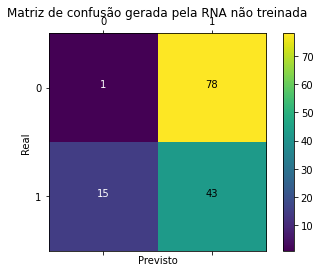

In [54]:
# Importa funções para calcula matriz e confusão
from sklearn.metrics import confusion_matrix
import itertools

# Define função para construir matriz de confusão
def plot_confusion_matrix(y_true, y_pred, title='', labels=[0,1]):
    cm = confusion_matrix(y_true, y_pred)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(cm)
    plt.title(title)
    fig.colorbar(cax)
    ax.set_xticklabels([''] + labels)
    ax.set_yticklabels([''] + labels)
    plt.xlabel('Previsto')
    plt.ylabel('Real')
    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
          plt.text(j, i, format(cm[i, j], fmt),
                  horizontalalignment="center",
                  color="black" if cm[i, j] > thresh else "white")
    plt.show()
    
plot_confusion_matrix(Y_test, tf.round(outputs), title='Matriz de confusão gerada pela RNA não treinada')    

# 5. Treinamento da RNA

Para treinar essa RNA vamos criar um loop customizado usando a função `tf.GradientTape()`. 


### Exercício #6: Criar função para calcular gradientes e atualizar parâmetros

Na célula abaixo crie um função que calcula o gradiente da função de custo em relação aos parâmetros da RNA e depois atualiza esses parâmetros usando o otimizador configurado anteriormente.

Para acessar os parâmetros de um modelo do TensorFlow basta usar `model.trainable_weights`.

In [61]:
# Para você fazer: criar função que calcula gradientes e atualiza parâmetros da RNA

def apply_gradient(optimizer, loss_object, model, x, y):
    '''
    Função para calcular o gradinet e atualizar os parâmetros da RNA
    
    Argumentos:
        optimizer: otimizador configurado para atualizar os parâmetros
        loss_object: função de custo configurada anteriormente
        model: RNA que está sendo treinada
        x: tensor com os dados de entrada de treinamento
        y: saídas desejadas dos dados de treinamento
        
    Retorna:
        logits = saídas previstas pela RNA
        loss_value = valor da função de custo
    '''
    
    # Inclua seu código aqui
    #
    with tf.GradientTape() as tape:
        logits = model(x)
        loss_value = loss_object(y, logits)

    gradients = tape.gradient(loss_value, model.trainable_weights)
    optimizer.apply_gradients(zip(gradients, model.trainable_weights))
    return logits, loss_value

Execute a célula abaixo para testar a sua função `apply_gradient()`.

In [62]:
# Cria nova RNA iagual a configurada
test_model = rna

# Calcula saída prevista e função de custo
test_logits, test_loss = apply_gradient(optimizer, loss_object, test_model, X_test, Y_test)

print('Primeiras 5 saídas:', test_logits.numpy()[:5])
print('\nFunção de custo =', test_loss.numpy())

del test_model
del test_logits
del test_loss

Primeiras 5 saídas: [[0.48800448]
 [0.5265975 ]
 [0.60801107]
 [0.57203114]
 [0.6035938 ]]

Função de custo = 0.7841954


**Saída esperada:**

    Primeiras 5 saídas: [[0.57383853]
     [0.53157353]
     [0.43801865]
     [0.47596937]
     [0.4938018 ]]
    
    Função de custo = 0.6647787

### Exercício #7: Cálculo da função de custo e métrica para os dados de validação

No final de cada época de treinamento, temos que validar a RNA no conjunto de dados de teste. Crie uma função que calcula a função de custo e a métrica para os dados validação.

In [69]:
# Para você fazer: função para calcular custo e métrica dos dados de validação

# Função para calcular custo e métrica dos dados de validação
def perform_validation(model, x_val, y_val):
    #Calcula custo dos dados de validação
    # Inclua seu código aqui
    #
    val_loss = loss_object(y_val, model(x_val))
    # Calcula classes arredondando as saídas previstas (valores iguais a 0 ou 1)
    # Inclua seu código aqui
    #
    val_pred = [0 if i < 0.5 else 1 for i in model(x_val)]
    # Calcula métrica para dados de validação
    # Inclua seu código aqui
    #
    val_accuracy = metric_object(y_val, val_pred)
    return val_loss, val_accuracy

Execute a célula abaixo para testar a sua função `perform_validation()`.

In [70]:
val_loss, val_accuracy = perform_validation(rna, X_test, Y_test)

print('Função de custo para os dados de teste =', val_loss.numpy())
print('Exatidão para os dados de teste =', val_accuracy.numpy())

Função de custo para os dados de teste = 0.7278534
Exatidão para os dados de teste = 0.32179803


**Saída esperada:**

    Função de custo para os dados de teste = 0.7662731
    Exatidão para os dados de teste = 0.16788322

### Exercício #8: Loop e treinamento customizado

Usando a função `apply_gradient()` vamos criar um loop de treinamemto customizado. Utilize 1000 épocas de treinamento.


In [72]:
# Para você fazer: Loop de treinamento customizado

# Define número de épocas
num_epocas = 1000

# Loop de treinamento
for i in range(num_epocas):
    # Calcula gradientes e atualiza parâmetros da RNA
    # Inclua seu código aqui
    #
    Y_pred, loss_value = apply_gradient(optimizer, loss_object, rna, X_train, Y_train)
    # Calcula métrica para dados de treinamento
    # Inclua seu código aqui
    #
    accuracy = metric_object(Y_train, Y_pred)
    # Calcula função de custo e métrica para dados de validação   
    # Inclua seu código aqui
    #
    val_loss = loss_object(Y_test, rna(X_test))
    val_accuracy = metric_object(Y_test, rna(X_test))
    
    # Imprime resultado da função de custo e métrica da época
    if i % 100 == 0:
        print('Época:', i, '-', 'custo =', loss_value.numpy(), '-', 'exatidão =', accuracy.numpy(), '-', 'custo_val =', val_loss.numpy(), '-', 'val_exatidão =', val_accuracy.numpy())

# Imprime resultado final
print('\nCusto final =', loss_value.numpy())
print('Exatidão final=', accuracy.numpy())
print('\nCusto final de validação =', val_loss.numpy())
print('Exatidão final de validação =', val_accuracy.numpy())

Época: 0 - custo = 0.74226403 - exatidão = 0.28719696 - custo_val = 0.67560756 - val_exatidão = 0.30745733
Época: 100 - custo = 0.062474646 - exatidão = 0.9500722 - custo_val = 0.08804867 - val_exatidão = 0.9500989
Época: 200 - custo = 0.038938053 - exatidão = 0.9630676 - custo_val = 0.08811283 - val_exatidão = 0.963068
Época: 300 - custo = 0.01685374 - exatidão = 0.96977276 - custo_val = 0.10830633 - val_exatidão = 0.969754
Época: 400 - custo = 0.006336014 - exatidão = 0.97455776 - custo_val = 0.13147911 - val_exatidão = 0.97454494
Época: 500 - custo = 0.002772748 - exatidão = 0.9775903 - custo_val = 0.14798385 - val_exatidão = 0.9775789
Época: 600 - custo = 0.0014584695 - exatidão = 0.9796137 - custo_val = 0.16148145 - val_exatidão = 0.9796035
Época: 700 - custo = 0.00088961987 - exatidão = 0.98105985 - custo_val = 0.17181797 - val_exatidão = 0.98105067
Época: 800 - custo = 0.000596274 - exatidão = 0.9821449 - custo_val = 0.18006115 - val_exatidão = 0.9821366
Época: 900 - custo = 0.0

**Saída esperada:**

    Época: 0 - custo = 0.68436486 - exatidão = 0.34634146 - custo_val = 0.6501663 - val_exatidão = 0.3448276
    Época: 100 - custo = 0.058527242 - exatidão = 0.9515191 - custo_val = 0.080492094 - val_exatidão = 0.9515428
    Época: 200 - custo = 0.03760329 - exatidão = 0.96556544 - custo_val = 0.07935773 - val_exatidão = 0.9655706
    Época: 300 - custo = 0.018621787 - exatidão = 0.9716702 - custo_val = 0.09142268 - val_exatidão = 0.97165996
    Época: 400 - custo = 0.008029577 - exatidão = 0.9759616 - custo_val = 0.11785624 - val_exatidão = 0.97595173
    Época: 500 - custo = 0.0036735435 - exatidão = 0.9789992 - custo_val = 0.14663258 - val_exatidão = 0.9789901
    Época: 600 - custo = 0.0019131048 - exatidão = 0.9810311 - custo_val = 0.17128268 - val_exatidão = 0.98102283
    Época: 700 - custo = 0.0011265007 - exatidão = 0.9824835 - custo_val = 0.19244863 - val_exatidão = 0.982476
    Época: 800 - custo = 0.00072901906 - exatidão = 0.983407 - custo_val = 0.21075746 - val_exatidão = 0.9833984
    Época: 900 - custo = 0.0005036661 - exatidão = 0.984111 - custo_val = 0.2269108 - val_exatidão = 0.98410314
    
    Custo final = 0.0003456268
    Exatidão final= 0.98466927

    Custo final de validação = 0.24358612
    Exatidão final de validação = 0.98466206 

## 7. Avaliação e teste da RNA

### Exercício #9: Cálculo da função de custo e métrica para os dados de teste

Na célula abaixo calcule a função de custo e a métrica para os dados de teste.

In [75]:
#Para você fazer: cálculo da função de custo e métrica para os dados de teste

# Calcula saída prevista para os dados de teste
# Inclua seu código aqui
#
outputs = rna.predict(X_test)
# Calcula função de custo para os dados de teste
# Inclua seu código aqui
#
loss_value = loss_object(Y_test, outputs)
# Calcula métrica para os dados de teste
# Inclua seu código aqui
#
metric_value = metric_object(Y_test, outputs)

print("Custo =", loss_value.numpy())
print("Exatidão =", metric_value.numpy())

Custo = 0.19299471
Exatidão = 0.98363763


**Saída esperada:**

    Custo = 0.24358612
    Exatidão = 0.9846549

Execute a célula abaixo para calcular a matriz de confusão para a RNA treinada.

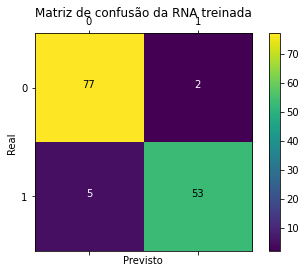

In [76]:
plot_confusion_matrix(Y_test, tf.round(outputs), title='Matriz de confusão da RNA treinada')

- Observa-se que o resultado da RNA é bastante satisfatório, sendo que apenas algumas amostras são classificadas erradas.

- Cerca de 96% das amostra são classificadas corretamente.